# import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

# Accessing the Data about orthopedic

In [2]:
dataset=pd.read_csv('../Dataset/orthopedic dataset.csv')

In [3]:
print(dataset.head(5))

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  


In [97]:
print("column Names:",dataset.columns.values)

column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [104]:
dataset.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [8]:
miss_val = dataset.isna().sum()
miss_val

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [9]:
dataset.shape

(310, 7)

# Data Analysis

In [10]:
dataset_num=dataset.select_dtypes(include=['float64','int64'])
print(dataset_num.head())

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  
0      98.672917                 -0.254400  
1     114.405425                  4.564259  
2     105.985135                 -3.530317  
3     101.868495                 11.211523  
4     108.168725                  7.918501  


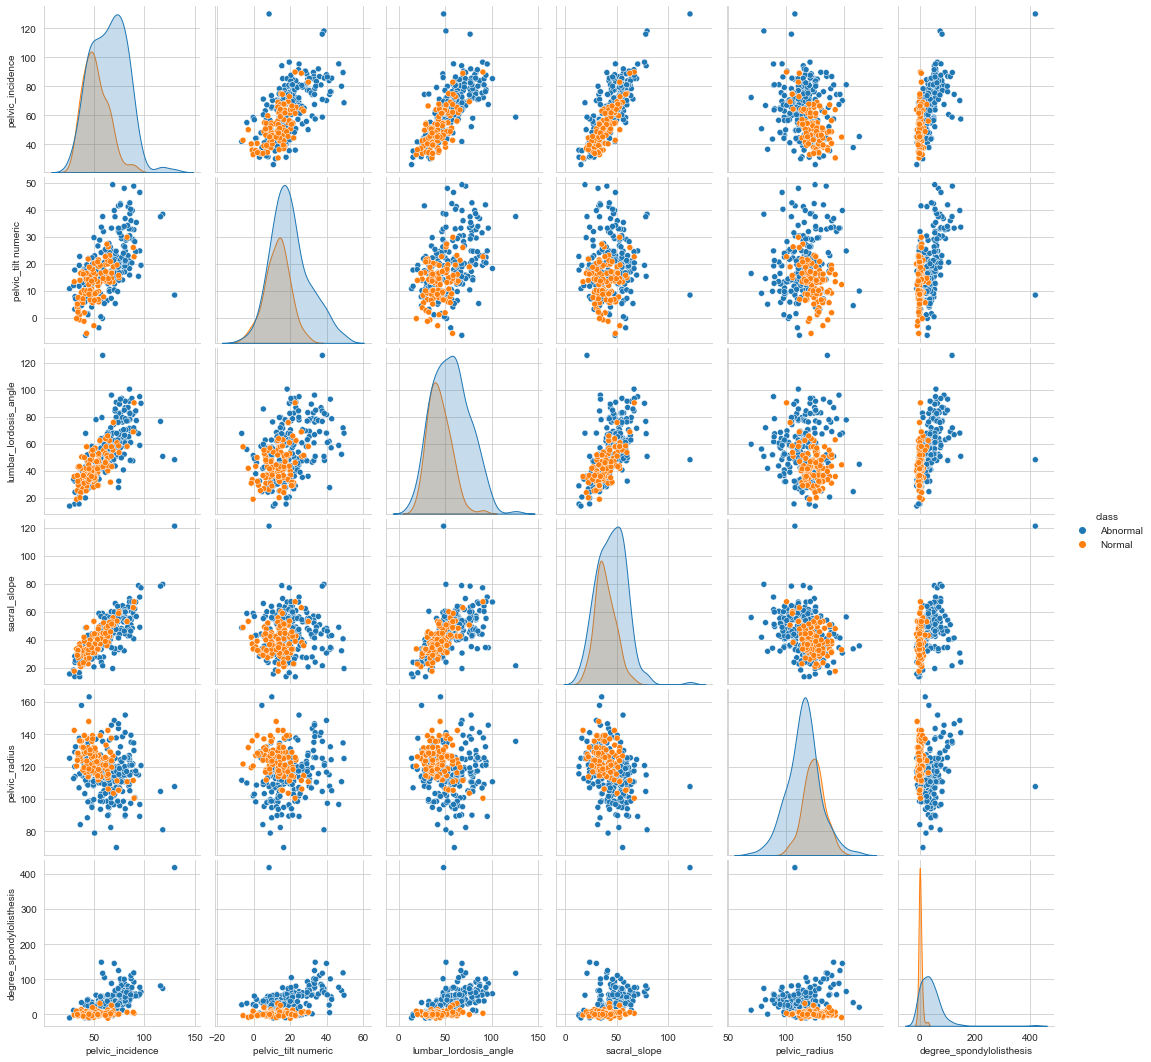

In [11]:
sns.set_style("whitegrid")
sns.pairplot(dataset,hue="class",diag_kind = "kde",kind = "scatter")
plt.show()

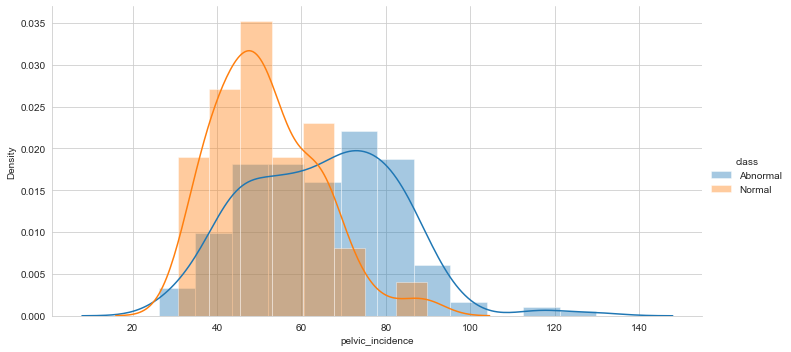

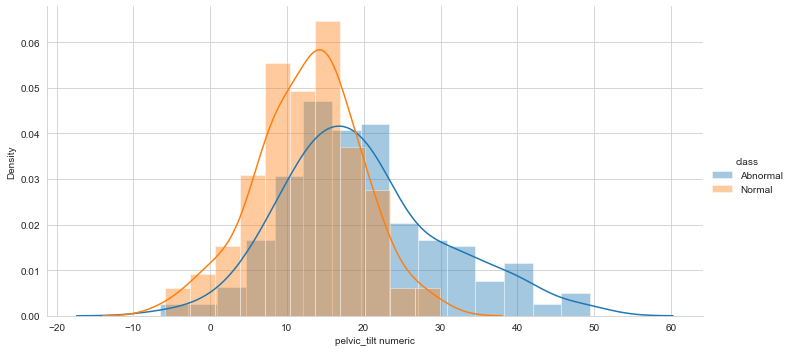

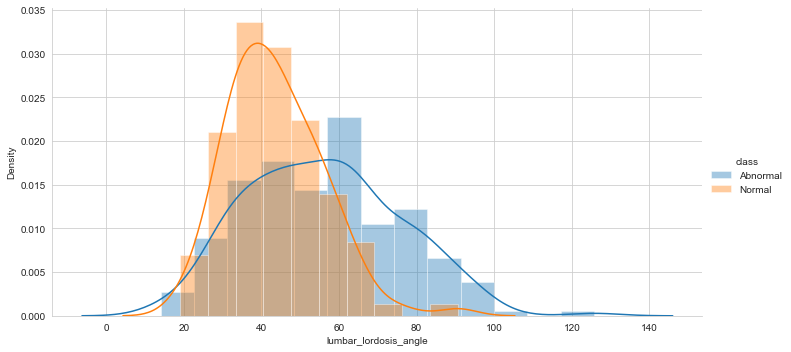

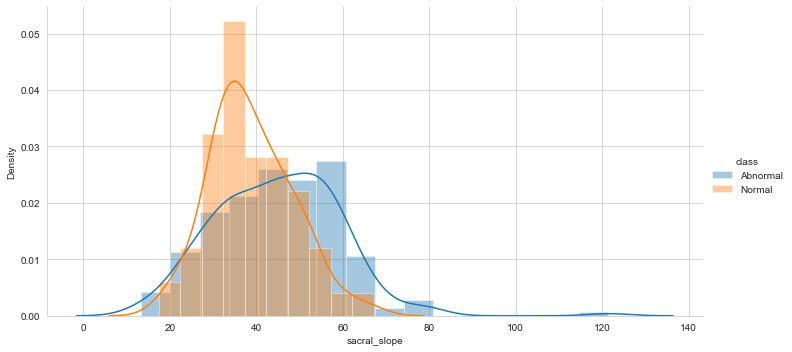

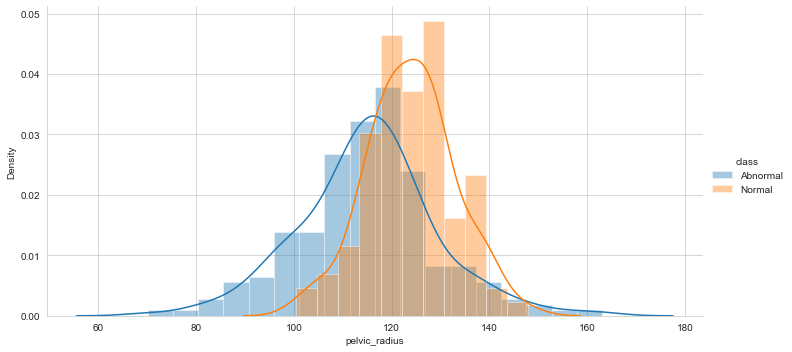

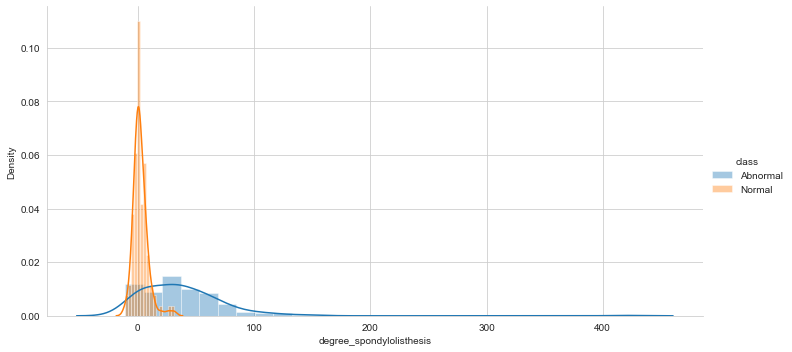

In [91]:
for name in dataset.columns.values[:-1]:
    sns.FacetGrid(dataset, hue="class",height=5,aspect=2).map(sns.distplot, name).add_legend()
plt.show()

<AxesSubplot:>

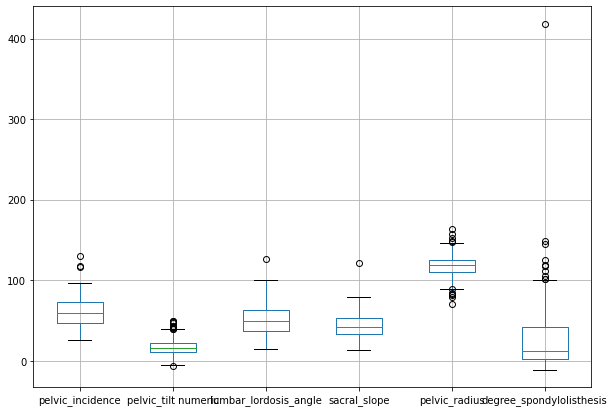

In [11]:
dataset.boxplot(column=['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
 'sacral_slope' ,'pelvic_radius', 'degree_spondylolisthesis' ],figsize=(10,7))

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['class1']=le.fit_transform(dataset['class'])

In [13]:
data_ct=dataset.select_dtypes(include='object')
data_ct.head(10)

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal
5,Abnormal
6,Abnormal
7,Abnormal
8,Abnormal
9,Abnormal


In [14]:
dataset['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Text(0.5, 1.0, 'class distribution')

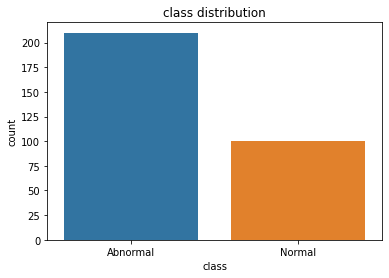

In [15]:
sns.countplot('class',data=dataset)
plt.title("class distribution")

In [16]:
corr=dataset.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.353336
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.443687
class1,-0.353336,-0.326063,-0.312484,-0.210602,0.309857,-0.443687,1.000000


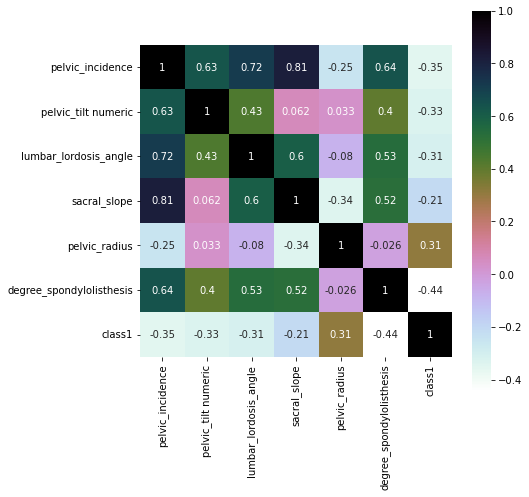

In [17]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)
plt.show()

In [18]:
dataset.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,class1
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,0


# Applying KNN bayes

In [15]:
dataset.drop(['class'],axis=1,inplace=True)

In [16]:
dataset.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


In [17]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [18]:
impute=SimpleImputer()
X=impute.fit_transform(X)

In [19]:
scale=StandardScaler()
X=scale.fit_transform(X)

In [20]:
#spliting data
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=97,shuffle=True)

In [21]:
test_accuracy = []

for k in range(1,26):                                 # K from 1 to 25
    KNN = KNeighborsClassifier(n_neighbors=k,weights='distance',algorithm='auto')         #KNN Classifier with K = k
    KNN.fit(train_x, train_y)
#######################################################################################
    test_pred = KNN.predict(test_x)                   #prediction on test data
    test_score = accuracy_score(test_y,test_pred)     #test accuracy
    test_accuracy.append(test_score)  
    
#######################################################################################

print("Best accuracy is {} with K = {}".format(max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))

Best accuracy is 0.9354838709677419 with K = 17


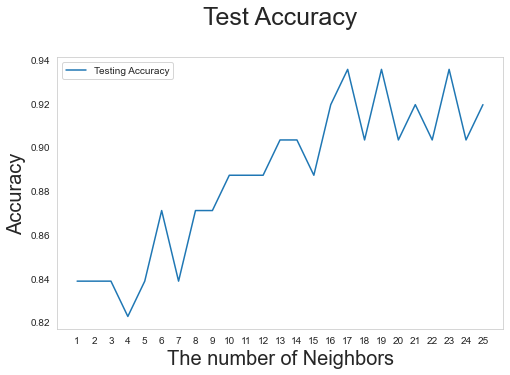

In [22]:
#Test_Accuracy
plt.figure(figsize=[8,5])
plt.plot(range(1,26), test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.title('Test Accuracy\n',fontsize=25)
plt.xlabel('The number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(range(1,26))
plt.grid()
plt.show()

In [23]:
#applying KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17,weights='distance',algorithm='auto')
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=17, weights='distance')

In [24]:
#calculate predicted y
pred=knn.predict(test_x)
print('the real y test\n',test_y[:10])
print('the predicted y test\n',pred[:10])

the real y test
 [1 0 0 0 0 0 1 0 1 1]
the predicted y test
 [1 0 0 0 0 0 1 0 1 0]


confusion matrix is 
 [[39  1]
 [ 3 19]]


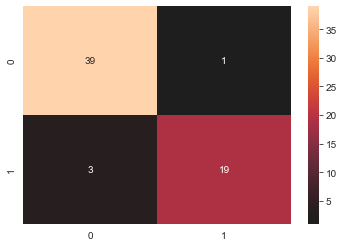

In [25]:
#calculate confusion matrix
cm=confusion_matrix(test_y, pred)
print('confusion matrix is \n',cm)
sns.heatmap(cm,annot=True,center=True)
plt.show()

In [55]:
knn_acc=accuracy_score(test_y, pred)
print('accuracy score is ',round(knn_acc,2)*100,"%")

accuracy score is  94.0 %


# Applying naive bayes

In [27]:
#spliting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=295)

In [28]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('the actual y test\n',y_test[:10])
print('the predicted y test\n',y_pred[:10])

the actual y test
 [0 0 1 0 0 0 1 1 0 0]
the predicted y test
 [0 1 1 0 1 0 1 1 0 0]


confusion matrix is 
 [[37  3]
 [ 0 22]]


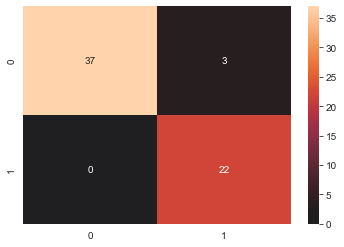

In [30]:
# define the Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix is \n',cm)
sns.heatmap(cm,annot=True,center=True)
plt.show()

In [31]:
#predicted_probabilities
print(classifier.predict_proba(X_test)[:10])
print('the actual y test\n',y_test[:10])
print('the predicted y test\n',y_pred[:10])

[[1.00000000e+00 5.56434299e-14]
 [1.54703062e-02 9.84529694e-01]
 [1.31273144e-02 9.86872686e-01]
 [9.99956378e-01 4.36222688e-05]
 [3.12567280e-02 9.68743272e-01]
 [5.21364214e-01 4.78635786e-01]
 [1.09470330e-01 8.90529670e-01]
 [1.17713385e-01 8.82286615e-01]
 [6.28022171e-01 3.71977829e-01]
 [9.99999918e-01 8.23671708e-08]]
the actual y test
 [0 0 1 0 0 0 1 1 0 0]
the predicted y test
 [0 1 1 0 1 0 1 1 0 0]


In [32]:
#calculate accuracy
accuracy=accuracy_score(y_test,y_pred)
print(round(accuracy,2)*100,'%')

95.0 %


# Applying decision tree

In [33]:
#Split data into train and test parts
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.29,random_state=48,shuffle=True)

In [34]:
#Applying the model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=44)
dt.fit(X_tr, y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=44)

In [35]:
#define train and test score
print('the train score =',dt.score(X_tr,y_tr))
print('the test score =',dt.score(X_te,y_te))
print('the classes',dt.classes_)
print('the importance of features',dt.feature_importances_)

the train score = 0.8727272727272727
the test score = 0.9111111111111111
the classes [0 1]
the importance of features [0.         0.04409268 0.13272551 0.04709135 0.09432993 0.68176052]


In [36]:
#define predicted y
y_pr=dt.predict(X_te)
print('the predicted y\n',y_pred[:10])
print('the real y\n',y_test[:10])


the predicted y
 [0 1 1 0 1 0 1 1 0 0]
the real y
 [0 0 1 0 0 0 1 1 0 0]


confusion matrix is
 [[62  1]
 [ 7 20]]


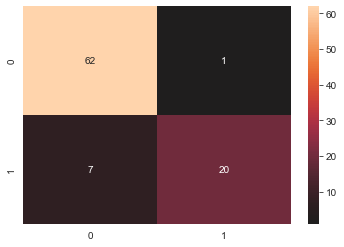

In [42]:
#define confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_te, y_pr) 
print('confusion matrix is\n',cm)
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [43]:
#measure the accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_te, y_pr)
print('the accurcy score is ',round(ac,2)*100,"%")

the accurcy score is  91.0 %


# compere with all accurse

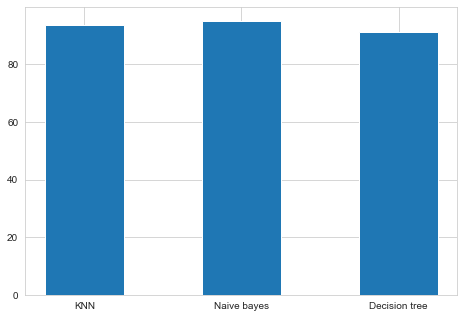

In [83]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['KNN', 'Naive bayes', 'Decision tree']
all_acc = [round(knn_acc*100,2),round(accuracy*100,2),round(ac*100,2)]
ax.bar(model,all_acc,width=0.5)
plt.show()

In [84]:
all_acc = [round(knn_acc*100,2),round(accuracy*100,2),round(ac*100,2)]
print(all_acc)

[93.55, 95.16, 91.11]
